In [1]:
import numpy as np
import pandas as pd 
import nltk 
import string 

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#classification algorithms 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
data = pd.read_csv('/Users/sudeshgurung/Msc-Data_Analytics/ADTA_with_python/coursework_part_2/Part_2/dataset/amazon_cells_labelled.txt', sep="\t" , names = ['Review', 'Sentiment'])
data.head()



,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


### pre-processing before classification 

In [4]:
reviews = data.astype({'Review': 'string'})
reviews.dtypes

Review       string
Sentiment     int64
dtype: object

In [5]:
# only the reviews for text pre-processing 
reviews = reviews['Review']
reviews[:5]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
Name: Review, dtype: string

In [6]:
reviews1 = []

for row in reviews: 
    #remove punctuation 
    row = row.translate(str.maketrans('', '', string.punctuation))
    
    #remove digits/numbers 
    row = row.translate(str.maketrans('', '', string.digits))
    
    #change to lowercase 
    row = row.lower()
    
    reviews1.append(row)

In [7]:
reviews1[:5]

['so there is no way for me to plug it in here in the us unless i go by a converter',
 'good case excellent value',
 'great for the jawbone',
 'tied to charger for conversations lasting more than  minutesmajor problems',
 'the mic is great']

In [8]:
reviews1 = pd.Series(reviews1)
reviews1[:5]

0    so there is no way for me to plug it in here i...
1                            good case excellent value
2                                great for the jawbone
3    tied to charger for conversations lasting more...
4                                     the mic is great
dtype: object

In [9]:
# removing character less than 3
removing_lt_3 = reviews1.apply(lambda x: ' '.join(term for term in x.split() if len(term) > 2))
removing_lt_3

0           there way for plug here the unless converter
1                              good case excellent value
2                                  great for the jawbone
3      tied charger for conversations lasting more th...
4                                          the mic great
                             ...                        
995    the screen does get smudged easily because tou...
996           what piece junk lose more calls this phone
997                          item does not match picture
998    the only thing that disappoint the infra red p...
999    you can not answer calls with the unit never w...
Length: 1000, dtype: object

In [10]:
# setting english stopwords
stop_words = set(stopwords.words('English'))

reviews1 = removing_lt_3.apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
reviews1[:10]

0                            way plug unless converter
1                            good case excellent value
2                                        great jawbone
3    tied charger conversations lasting minutesmajo...
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contacts imagine...
7                                   razr owneryou must
8                            needless say wasted money
9                                     waste money time
dtype: object

In [11]:
reviews1[3]

'tied charger conversations lasting minutesmajor problems'

In [12]:
#lemmatizing 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
reviews2 = reviews1.apply(lambda x: ' '.join(lemmatizer.lemmatize(w) for w in x.split()))
reviews2

0                              way plug unless converter
1                              good case excellent value
2                                          great jawbone
3      tied charger conversation lasting minutesmajor...
4                                              mic great
                             ...                        
995             screen get smudged easily touch ear face
996                           piece junk lose call phone
997                                   item match picture
998                 thing disappoint infra red port irda
999                        answer call unit never worked
Length: 1000, dtype: object

In [13]:
# apply lemmatizing with POS tags 
from nltk.corpus import wordnet 

def get_wordnet_pos(word):
    # Map POS tag to first character Lemmatize() accepts 
    tag = nltk.pos_tag([word])[0][1][0].upper()
#     display(tag)
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN, 
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

# init WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
reviews3 = reviews1.apply(lambda x: ' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
reviews3[:10] 

0                            way plug unless converter
1                            good case excellent value
2                                        great jawbone
3    tie charger conversation last minutesmajor pro...
4                                            mic great
5         jiggle plug get line right get decent volume
6    several dozen several hundred contact imagine ...
7                                   razr owneryou must
8                               needle say waste money
9                                     waste money time
dtype: object

In [14]:
#putting back preprocessed text and labels 

temp = list(zip(reviews3, data.Sentiment))
processed_reviews = pd.DataFrame(temp, columns = ['Review', 'Sentiment'])
processed_reviews

,Review,Sentiment
0,way plug unless converter,0
1,good case excellent value,1
2,great jawbone,1
3,tie charger conversation last minutesmajor pro...,0
4,mic great,1
...,...,...
995,screen get smudge easily touch ear face,0
996,piece junk lose call phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [15]:
# processed_reviews['Sentiment'] = processed_reviews.Sentiment.map({
#     0: "NEG", 
#     1: "POS"
# })

# processed_reviews

### Shuffling the data 

In [16]:
reviews_shuffeled = processed_reviews.sample(frac=1, random_state=1).reset_index()
reviews_shuffeled

,index,Review,Sentiment
0,507,holster arrive match photo,0
1,818,doesnt job,0
2,452,colleague get great receptiona little expensiv...,1
3,368,love phone,1
4,242,bad customer service ever,0
...,...,...,...
995,767,really want plantronics right one many issue m...,0
996,72,great choice,1
997,908,hear drive car usually dont even put loud set,1
998,235,one favorite purchase ever,1


## Spliting the data into Train and Test

In [17]:
X = reviews_shuffeled['Review']
y = reviews_shuffeled['Sentiment']

#split the dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(700,)
(700,)
(300,)
(300,)


### Making bag of words out of test and train sentences

### 1. Count Vectorizer

In [19]:
# # using count vectorizer
# cv = CountVectorizer(analyzer='word', ngram_range=(1, 1))

# #transformed train_sentence
# cv_reviews_train = cv.fit_transform(X_train)
# train_features = cv.get_feature_names_out()
# #transformed test_sentence
# cv_reviews_test = cv.transform(X_test)

# print(cv_reviews_train.shape)
# print(cv_reviews_test.shape)
# print(train_features.shape)
# test_features = cv.get_feature_names_out()

In [20]:
# bag_of_words_cv_train = pd.DataFrame(data=cv_reviews_train.toarray(), columns = train_features)
# bag_of_words_cv_test =pd.DataFrame(data=cv_reviews_test.toarray(), columns = test_features)


### 2. Tf-idf Vectorizer

In [81]:
# using tfidf vectorizer 
tv = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
# tv = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), stop_words='english', max_df=0.8, min_df =5)
# tv = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), stop_words='english')
#transformed train_sentence
tv_reviews_train = tv.fit_transform(X_train)
tv_train_features = tv.get_feature_names_out()
# display(tv_train_features)
#test dataset
tv_reviews_test = tv.transform(X_test)
tv_test_features = tv.get_feature_names_out()

print(tv_reviews_train.shape)
print(tv_reviews_test.shape)

(700, 1215)
(300, 1215)


In [82]:
bag_of_words_tv_train = pd.DataFrame(data = tv_reviews_train.toarray(), columns = tv_train_features)
bag_of_words_tv_test = pd.DataFrame(data = tv_reviews_test.toarray(), columns = tv_test_features)

## Functions

In [83]:
def confusion_matrix_plot(cm):
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['NEG', 'POS'])
    ax.yaxis.set_ticklabels(['NEG', 'POS'])
    
    plt.show()

## Classification Algorithms

## 1. Decision Tree

dt tv_tfidf accuracy : 0.71


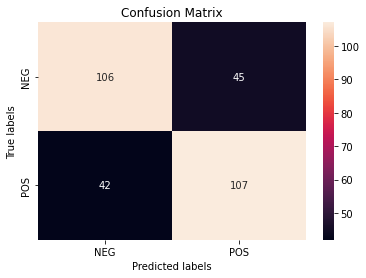

,precision,recall,f1-score,support
NEG,0.716216,0.701987,0.709030,151.00
POS,0.703947,0.718121,0.710963,149.00
accuracy,0.710000,0.710000,0.710000,0.71
macro avg,0.710082,0.710054,0.709997,300.00
weighted avg,0.710123,0.710000,0.709990,300.00


In [84]:
#initializing the model
dt = DecisionTreeClassifier(criterion ='entropy', random_state = 1)

# #Fitting the model for Bag of words
# dt_bow = dt.fit(cv_reviews_train,y_train)

#Fitting the model for tfidf features
dt_bow_tfidf = dt.fit(tv_reviews_train,y_train)

# #Predicting the model for bag of words
# dt_bow_predict = dt.predict(cv_reviews_test)

##Predicting the model for tfidf features
dt_tfidf_predict = dt.predict(tv_reviews_test)

# #Accuracy score for bag of words
# dt_bow_score = accuracy_score(y_test, dt_bow_predict)
# print("dt cv_bow accuracy :",dt_bow_score)

#Accuracy score for tfidf features
dt_tfidf_score=accuracy_score(y_test ,dt_tfidf_predict)
print("dt tv_tfidf accuracy :",dt_tfidf_score)

# #Classification report for bag of words 
# dt_bow_report=classification_report(y_test,dt_bow_predict,target_names= ['NEG', 'POS'], output_dict = True)


# cm_cv = confusion_matrix(y_test ,dt_bow_predict)
# confusion_matrix_plot(cm_cv)
# display(pd.DataFrame(dt_bow_report).T)

#Classification report for tfidf features
dt_tfidf_report=classification_report(y_test,dt_tfidf_predict,target_names= ['NEG', 'POS'], output_dict = True)
cm_tv = confusion_matrix(y_test,dt_tfidf_predict)
confusion_matrix_plot(cm_tv)
display(pd.DataFrame(dt_tfidf_report).T)


In [106]:
# cross validation 

# test_tv = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), stop_words='english', max_df=0.8, min_df =5)
# test_tv = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), stop_words='english')
test_tv = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
x_values = test_tv.fit_transform(reviews_shuffeled['Review'])
df_test = pd.DataFrame(x_values.toarray(), columns = test_tv.get_feature_names_out())
# display(df_test)

scores = cross_val_score(dt, df_test, reviews_shuffeled['Sentiment'], cv=10)

#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))



Accuracy: 0.74 (+/- 0.14)


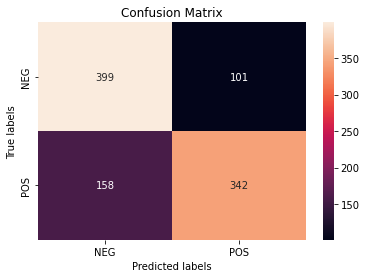

Accuracy: 0.741


,precision,recall,f1-score,support
NEG,0.716338,0.798,0.754967,500.000
POS,0.772009,0.684,0.725345,500.000
accuracy,0.741000,0.741,0.741000,0.741
macro avg,0.744173,0.741,0.740156,1000.000
weighted avg,0.744173,0.741,0.740156,1000.000


In [107]:
#predicted values
dt_cv_tfidf_predict = cross_val_predict(dt, df_test, reviews_shuffeled['Sentiment'], cv=10)

cm_tv_cross_dt = confusion_matrix(reviews_shuffeled['Sentiment'], dt_cv_tfidf_predict)
confusion_matrix_plot(cm_tv_cross_dt)

rep = classification_report(reviews_shuffeled['Sentiment'], dt_cv_tfidf_predict, target_names= ['NEG', 'POS'], output_dict = True)

print("Accuracy:", accuracy_score(reviews_shuffeled['Sentiment'], dt_cv_tfidf_predict))
pd.DataFrame(rep).T


## 2. Naïve Bayes Classifier

nb tv_tfidf accuracy : 0.8


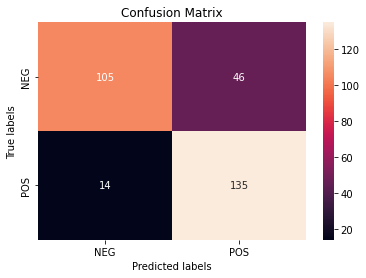

,precision,recall,f1-score,support
NEG,0.882353,0.695364,0.777778,151.0
POS,0.745856,0.906040,0.818182,149.0
accuracy,0.800000,0.800000,0.800000,0.8
macro avg,0.814105,0.800702,0.797980,300.0
weighted avg,0.814560,0.800000,0.797845,300.0


In [108]:
nb = MultinomialNB()

#Fitting the model for Bag of words

nb_bow_tfidf = nb.fit(tv_reviews_train,y_train)

#Predicting the model for bag of words

nb_tfidf_predict = nb.predict(tv_reviews_test)

#Accuracy score for bag of words

nb_tfidf_score=accuracy_score(y_test,nb_tfidf_predict)
print("nb tv_tfidf accuracy :",nb_tfidf_score)

#Classification report 

nb_tfidf_report=classification_report(y_test,nb_tfidf_predict, target_names= ['NEG', 'POS'], output_dict = True)
cm_nb_tv = confusion_matrix(y_test,nb_tfidf_predict)
confusion_matrix_plot(cm_nb_tv)
display(pd.DataFrame(nb_tfidf_report).transpose())



In [88]:
scores = cross_val_score(nb, df_test, reviews_shuffeled['Sentiment'], cv=10)
print(scores)
#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.75 0.81 0.8  0.79 0.77 0.77 0.78 0.82 0.86 0.78]
Accuracy: 0.79 (+/- 0.06)


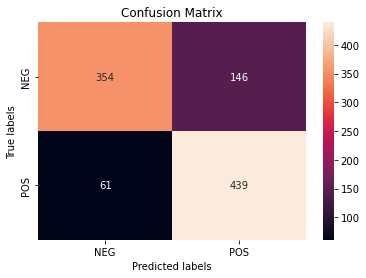

Accuracy: 0.793


,precision,recall,f1-score,support
NEG,0.853012,0.708,0.773770,500.000
POS,0.750427,0.878,0.809217,500.000
accuracy,0.793000,0.793,0.793000,0.793
macro avg,0.801720,0.793,0.791494,1000.000
weighted avg,0.801720,0.793,0.791494,1000.000


In [89]:
nb_cv_tfidf_predict = cross_val_predict(nb, df_test, reviews_shuffeled['Sentiment'], cv=10)

cm_tv_cross_nb = confusion_matrix(reviews_shuffeled['Sentiment'], nb_cv_tfidf_predict)
confusion_matrix_plot(cm_tv_cross_nb)

rep = classification_report(reviews_shuffeled['Sentiment'], nb_cv_tfidf_predict, target_names= ['NEG', 'POS'], output_dict = True)

print("Accuracy:", accuracy_score(reviews_shuffeled['Sentiment'], nb_cv_tfidf_predict))
pd.DataFrame(rep).T

## 3. SVM classifier

svm tv_tfidf accuracy : 0.8233333333333334


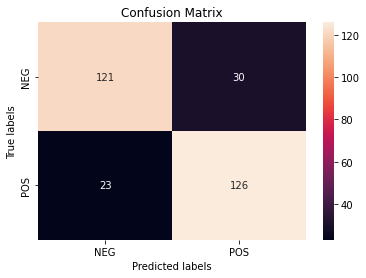

,precision,recall,f1-score,support
NEG,0.840278,0.801325,0.820339,151.000000
POS,0.807692,0.845638,0.826230,149.000000
accuracy,0.823333,0.823333,0.823333,0.823333
macro avg,0.823985,0.823481,0.823284,300.000000
weighted avg,0.824094,0.823333,0.823265,300.000000


In [110]:
# linear SVM
# svm = SGDClassifier(loss='hinge',max_iter=500)
svm = LinearSVC()
# svm = SVC(kernel = 'linear')

#Fitting the model for Bag of words

svm_bow_tfidf = svm.fit(tv_reviews_train,y_train)

#Predicting the model for bag of words

svm_tfidf_predict = svm.predict(tv_reviews_test)

#Accuracy score for bag of words

svm_tfidf_score=accuracy_score(y_test, svm_tfidf_predict)
print("svm tv_tfidf accuracy :",svm_tfidf_score)

#Classification report for bag of words 



svm_tfidf_report=classification_report(y_test, svm_tfidf_predict, target_names= ['NEG', 'POS'], output_dict = True)
cm_svm_tv = confusion_matrix(y_test, svm_tfidf_predict)
confusion_matrix_plot(cm_svm_tv)
display(pd.DataFrame(svm_tfidf_report).T) 


In [111]:
scores = cross_val_score(svm, df_test, reviews_shuffeled['Sentiment'], cv=10)
print(scores)
#print the average accuracy across all folds
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.79 0.82 0.79 0.82 0.78 0.86 0.85 0.83 0.86 0.77]
Accuracy: 0.82 (+/- 0.06)


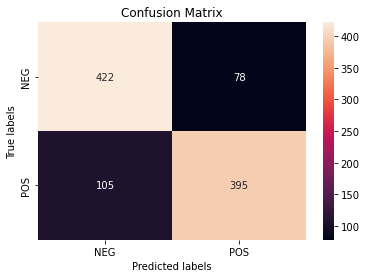

Accuracy: 0.817


,precision,recall,f1-score,support
NEG,0.800759,0.844,0.821811,500.000
POS,0.835095,0.790,0.811922,500.000
accuracy,0.817000,0.817,0.817000,0.817
macro avg,0.817927,0.817,0.816866,1000.000
weighted avg,0.817927,0.817,0.816866,1000.000


In [112]:
svm_cv_tfidf_predict = cross_val_predict(svm, df_test, reviews_shuffeled['Sentiment'], cv=10)

cm_tv_cross_svm = confusion_matrix(reviews_shuffeled['Sentiment'], svm_cv_tfidf_predict)
confusion_matrix_plot(cm_tv_cross_svm)

rep = classification_report(reviews_shuffeled['Sentiment'], svm_cv_tfidf_predict, target_names= ['NEG', 'POS'], output_dict = True)

print("Accuracy:", accuracy_score(reviews_shuffeled['Sentiment'], svm_cv_tfidf_predict))
pd.DataFrame(rep).T

## ROC Curves 

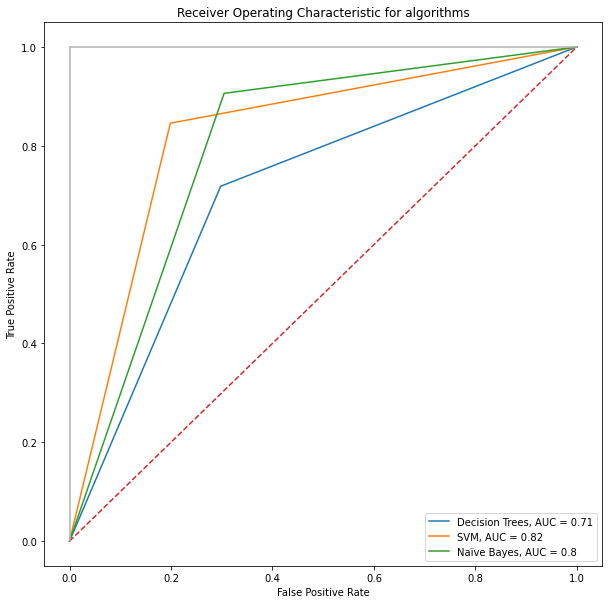

In [113]:
#decision tree
FP_DT, TP_DT, threshold_DT = roc_curve(y_test, dt_tfidf_predict)
auc_DT = round(roc_auc_score(y_test, dt_tfidf_predict), 2)

#NB
FP_NB, TP_NB, threshold_NB = roc_curve(y_test, nb_tfidf_predict)
auc_NB = round(roc_auc_score(y_test, nb_tfidf_predict), 2)

#SVM
FP_SVM, TP_SVM, threshold_SVM = roc_curve(y_test, svm_tfidf_predict)
auc_SVM = round(roc_auc_score(y_test, svm_tfidf_predict), 2)



plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic for algorithms')

plt.plot(FP_DT, TP_DT, label="Decision Trees, AUC = "+str(auc_DT))
plt.plot(FP_SVM, TP_SVM, label="SVM, AUC = "+str(auc_SVM))
plt.plot(FP_NB, TP_NB, label="Naïve Bayes, AUC = "+str(auc_NB))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

## ROC-AUC curve for cross validation

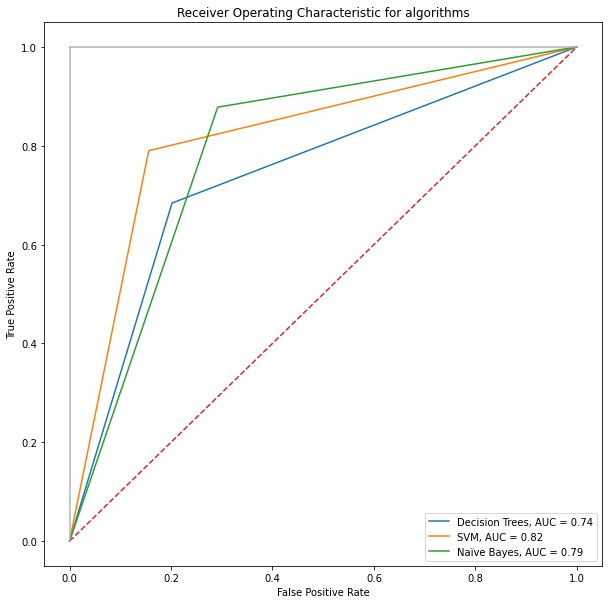

In [114]:
# decision tree for cross validation 
FP_DT, TP_DT, threshold_DT = roc_curve(reviews_shuffeled['Sentiment'], dt_cv_tfidf_predict)
auc_DT = round(roc_auc_score(reviews_shuffeled['Sentiment'], dt_cv_tfidf_predict), 2)

#NB
FP_NB, TP_NB, threshold_NB = roc_curve(reviews_shuffeled['Sentiment'], nb_cv_tfidf_predict)
auc_NB = round(roc_auc_score(reviews_shuffeled['Sentiment'], nb_cv_tfidf_predict), 2)

#SVM
FP_SVM, TP_SVM, threshold_SVM = roc_curve(reviews_shuffeled['Sentiment'], svm_cv_tfidf_predict)
auc_SVM = round(roc_auc_score(reviews_shuffeled['Sentiment'], svm_cv_tfidf_predict), 2)



plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic for algorithms')

plt.plot(FP_DT, TP_DT, label="Decision Trees, AUC = "+str(auc_DT))
plt.plot(FP_SVM, TP_SVM, label="SVM, AUC = "+str(auc_SVM))
plt.plot(FP_NB, TP_NB, label="Naïve Bayes, AUC = "+str(auc_NB))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [95]:
# skplt.metrics.plot_roc_curve(y_true, y_probas)
# plt.show()

## 4. Neural Networks 

In [96]:
# clf = MLPClassifier(solver='lbfgs', random_state = 1)

In [97]:
# scaler = MinMaxScaler()
# transformed_cv_train = scaler.fit_transform(bag_of_words_cv_train)
# transformed_cv_test = scaler.fit_transform(bag_of_words_cv_test)
# transformed_tv_train = scaler.fit_transform(bag_of_words_tv_train)
# transformed_tv_test = scaler.fit_transform(bag_of_words_cv_test)

In [98]:
# transformed_cv_train

In [99]:
# #fitting the data 
# clf_bow_cv = clf.fit(cv_reviews_train, y_train)
# clf_bow_tfidf = clf.fit(tv_reviews_train, y_train)

# # predicting the data 
# clf_cv_predict = clf.predict(cv_reviews_test)
# clf_tv_predict = clf.predict(tv_reviews_test)

# # accuracy 
# clf_cv_score = accuracy_score(y_test, clf_cv_predict)
# clf_tv_score = accuracy_score(y_test, clf_tv_predict)
# print("MLP Classifier cv_bow accuracy: ", clf_cv_score)
# print("MLP Classifier tv_bow accuracy: ", clf_tv_score)

# # classification report 
# clf_cv_report = classification_report(y_test, clf_cv_predict)
# print(confusion_matrix(y_test, clf_cv_predict))
# print(clf_cv_report)

# clf_tv_report = classification_report(y_test, clf_tv_predict)
# cm = confusion_matrix(y_test, clf_tv_predict)
# confusion_matrix_plot(cm)
# print(confusion_matrix(y_test, clf_tv_predict))
# print(clf_tv_report)



In [100]:
#AUC score and ROC curve

# FP, TP, threshold1 = roc_curve(y_test, clf_cv_predict)
# print('roc_auc_score for NB: ', roc_auc_score(y_test, clf_tv_predict))



# plt.subplots(1, figsize=(10,10))
# plt.title('Receiver Operating Characteristic - MLPClassifier')
# plt.plot(FP, TP)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [101]:
# from sklearn.pipeline import make_pipeline

In [102]:
# model = make_pipeline(TfidfVectorizer(analyzer= 'word', ngram_range=(1,1)), MLPClassifier(solver='lbfgs', random_state = 1))
# model.fit(X_train, y_train)
# prediction = model.predict(X_test)

In [103]:
# print(classification_report(y_test, prediction))

In [79]:
# model = make_pipeline(CountVectorizer(), DecisionTreeClassifier(criterion ='entropy'))
# model.fit(X_train, y_train)
# prediction = model.predict(X_test)

In [80]:
# print(classification_report(y_test, prediction))

## Cross validation 

In [53]:
# dt 

